In [1]:
from IPython.display import display, Image

# 사용한 연수로 맥북 중고가

### 데이터 확인


In [6]:
import pandas as pd


macbook = pd.read_csv('~/aiffel/bike_regression/data/macbook.csv')
macbook.head()

,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


### 상관계수



In [7]:
import numpy as np

In [8]:
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

### 모델 학습

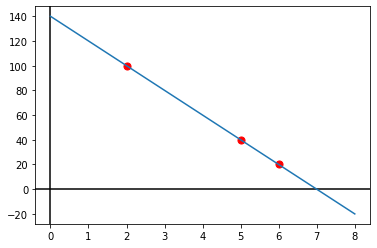

In [10]:
## 점 세개 지나는 모델
import matplotlib.pyplot as plt
def model(x, w, b):
    y = w * x + b
    return y


plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140)
plt.plot(y)

x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)
plt.show()

### 오차를 최소화 하는 모델


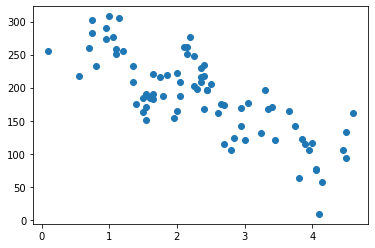

In [13]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

- 오차가 최소가 되는 직선을 찾아야 함
- w, b : 매개변수, 파라미터

## 최적의 방정식 구하기

### 손실함수 정의 하기

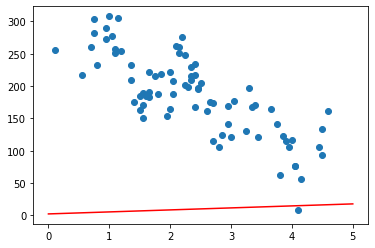

In [15]:

w =3.1
b = 2.3

x = np.linspace(0, 5, 6)
y = model(x,w,b)
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [17]:
x = macbook['used_years'].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [18]:
prediction = model(x, w, b)
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [19]:
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [20]:
## 정답, 예측간 사이

macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [25]:
def RMSE(a, b):
    mse = ((a - b)**2).mean()
    rmse = mse **0.5
    return rmse


In [30]:
x = macbook['used_years'].values
y = macbook['price'].values

prediction = model(x, w, b)

In [31]:
rmse = RMSE(prediction, y)
rmse



188.81322969819274

### 손실함수

In [32]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L


### 기울기와 경사하강법

- 손실을 줄여 나가면 됨
- 어떻게 줄여나가지?

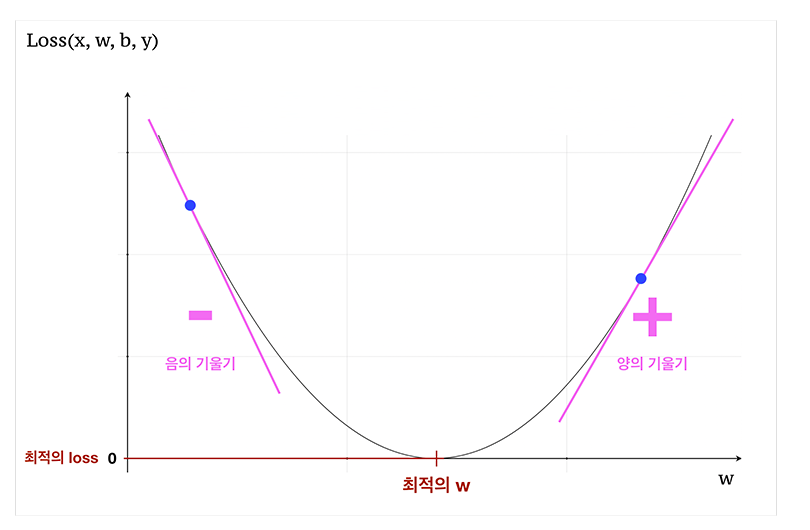

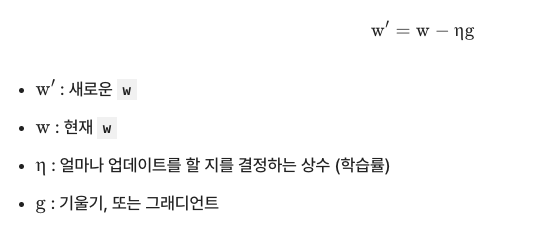

### 미분으로 경사 구하기

- 수치미분 : 근사한 미분계수 값을 찾는 방벙

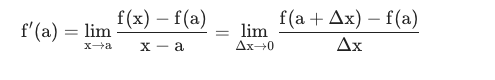

In [33]:
def gradient(x, w, b, y):
    dw = (loss(x, w+0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b+0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

### 하이퍼파라미터


In [34]:
LEARNING_RATE = 1

### 모델 최적화

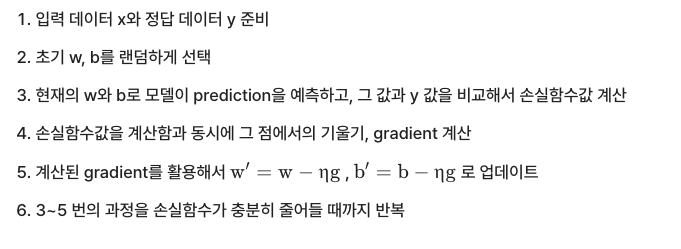

In [41]:
x = macbook['used_years'].values
y = macbook['price'].values



In [42]:
w = 3.1
b = 2.3
w, b

(3.1, 2.3)

In [43]:
losses = []

In [44]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x, w, b, y)
    losses.append(L)
    if i % 100 == 0:
        print(f'Iteration {i}: Loiss{L :0.4}')

Iteration 100: Loiss108.0
Iteration 200: Loiss94.57
Iteration 300: Loiss81.86
Iteration 400: Loiss70.18
Iteration 500: Loiss59.98
Iteration 600: Loiss51.75
Iteration 700: Loiss45.84
Iteration 800: Loiss42.15
Iteration 900: Loiss40.14
Iteration 1000: Loiss39.14
Iteration 1100: Loiss38.68
Iteration 1200: Loiss38.47
Iteration 1300: Loiss38.38
Iteration 1400: Loiss38.34
Iteration 1500: Loiss38.32
Iteration 1600: Loiss38.31
Iteration 1700: Loiss38.31
Iteration 1800: Loiss38.3
Iteration 1900: Loiss38.3
Iteration 2000: Loiss38.3


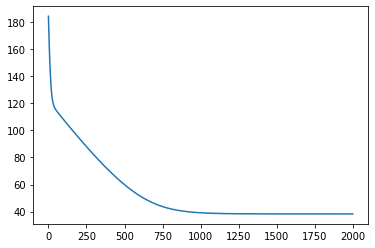

In [45]:
plt.plot(losses)
plt.show()

In [47]:
w, b

(-44.92756090768412, 293.0815786721102)

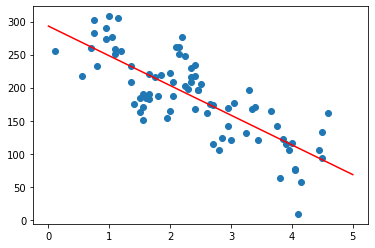

In [48]:
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c='r')
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

### 새 데이터로 확인

In [49]:
test = pd.read_csv('~/aiffel/bike_regression/data/macbook_test.csv')
test.head()

,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [54]:
test_x = test['used_years']
test_y = test['price']


In [55]:
test_pred = model(test_x, w, b)
test['prediction'] = test_pred
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [56]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [58]:
test_rmse = RMSE(test['prediction'], test['price'])
test_rmse

45.03918284717212

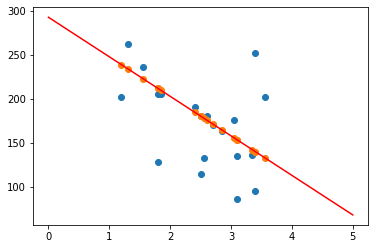

In [59]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()